# MP1 : Deep Learning

## Imports

In [1]:
import keras
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


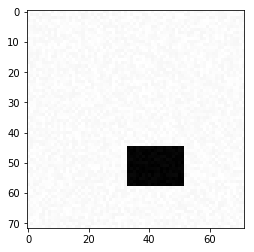

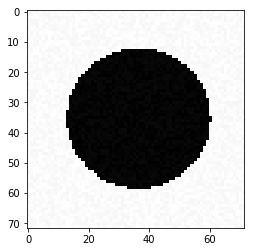

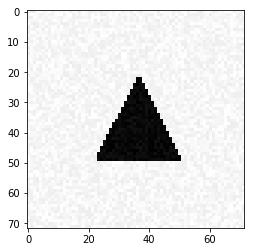

In [2]:
from tools import *

In [3]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data


## Simple Classification

In [6]:
Y = keras.utils.to_categorical(Y_train)
input_size = X_train.shape[1]
print('Nbr of cat: %i' % len(np.unique(Y_train)))
print('Input size: % i' % input_size)

Nbr of cat: 2
Input size:  5184


In [21]:
class SimpleClassifier:
    
    def __init__(self, input_size, output_size, opt='adam'):
        assert opt in ['sgd', 'adam'], "Optimizer unknown try sgd or adam"
        self.opt = opt
        model = keras.Sequential()
        model.add(keras.layers.Dense(output_size, input_dim=input_size, activation='softmax'))
        if self.opt == 'adam':
            optimizer=keras.optimizers.Adam(lr=0.001)
        else:
            optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9)
        self.model = model
        self.optimizer= optimizer
        self.model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    def fit(self, X_train, Y_train, batch_size=64, epochs=100, verbose=False, validation_split=0.1):
        self.model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_split=validation_split)
        
    def evaluate(self, X_test, Y_test):
        results = self.model.evaluate(X_test, Y_test)
        print('Loss: %f\nAcc: %f' % tuple(results))

In [26]:
sgdClassifier = SimpleClassifier(input_size, 3, opt='sgd')
sgdClassifier.fit(X_train, Y)
adamClassifier = SimpleClassifier(input_size, 3, opt='adam')
adamClassifier.fit(X_train, Y)

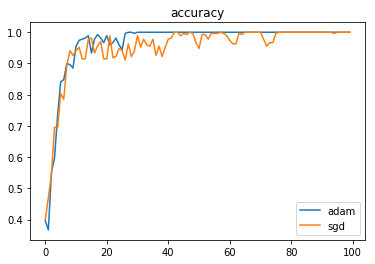

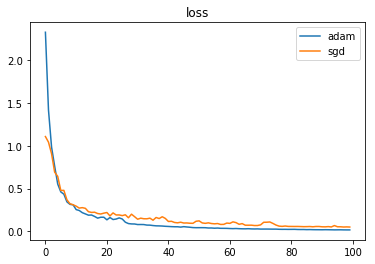

In [40]:
plt.plot(adamClassifier.model.history.history['acc'])
plt.plot(sgdClassifier.model.history.history['acc'])
plt.legend(['adam','sgd'])
plt.title('accuracy')
plt.show()

plt.plot(adamClassifier.model.history.history['loss'])
plt.plot(sgdClassifier.model.history.history['loss'])
plt.legend(['adam','sgd'])
plt.title('loss')
plt.show()

## Visualisation of the solution

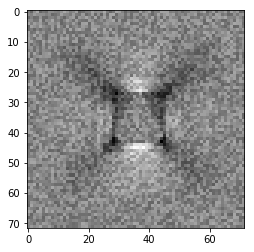

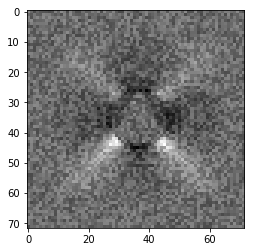

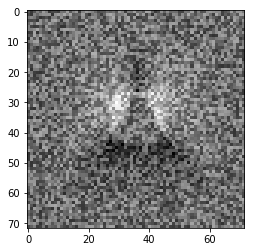

In [48]:
weights = adamClassifier.model.get_weights()[0].reshape(72,72,3)
for k in range(3):
    plt.imshow(weights[:,:,k], cmap='gray') 
    plt.show()

## A more difficult classification problem

In [22]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
[X_test, Y_test] = generate_test_set_classification()
Y_train =  keras.utils.to_categorical(Y_train)
Y_test =  keras.utils.to_categorical(Y_test)

Creating data
Creating data


In [23]:
adamClassifier2 = SimpleClassifier(input_size, 3, opt='adam')
adamClassifier2.fit(X_train,Y_train)

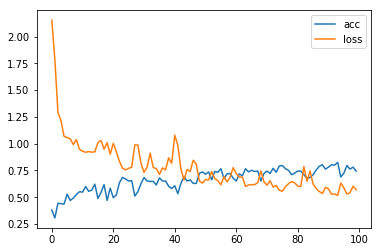

In [24]:
plt.plot(adamClassifier2.model.history.history['acc'])
plt.plot(adamClassifier2.model.history.history['loss'])
plt.legend(['acc','loss'])
#plt.title('loss')
plt.show()

In [25]:
adamClassifier2.evaluate(X_test,Y_test)

300/300 [==============================] - 0s 56us/step
Loss: 0.900896
Acc: 0.590000


The accuracy dropped from 1 to .59, therefore we need a new model.

In [35]:
[X_train, Y_train] = generate_dataset_classification(3200, 20, True)
[X_test, Y_test] = generate_test_set_classification()
X_train = X_train.reshape(-1,72,72,1)
Y_train = keras.utils.to_categorical(Y_train)
X_test = X_test.reshape(-1,72,72,1)
Y_test = keras.utils.to_categorical(Y_test)

Creating data
Creating data


In [37]:
class ConvNetwork:
    def __init__(self, input_shape, output_size, opt='adam'):
        assert opt in ['sgd', 'adam'], "Optimizer unknown try sgd or adam"
        self.opt = opt
        model = keras.Sequential()
        model.add(keras.layers.Conv2D(16, kernel_size=(5,5), activation='relu', input_shape=input_shape))
        model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
        model.add(keras.layers.Flatten())
        model.add(keras.layers.Dense(output_size,activation='softmax'))
        if self.opt == 'adam':
            optimizer=keras.optimizers.Adam(lr=0.001)
        else:
            optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9)
        self.model = model
        self.optimizer= optimizer
        self.model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    def fit(self, X_train, Y_train, batch_size=64, epochs=100, verbose=False, validation_split=0.1):
        self.model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_split=validation_split)
        plt.plot(self.model.history.history['acc'])
        plt.plot(self.model.history.history['loss'])
        plt.legend(['acc','loss'])
        plt.show()
        
    def evaluate(self, X_test, Y_test):
        results = self.model.evaluate(X_test, Y_test)
        print('Loss: %f\nAcc: %f' % tuple(results))

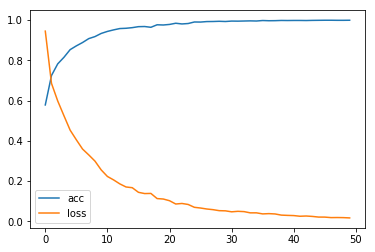

300/300 [==============================] - 0s 92us/step
Loss: 0.186777
Acc: 0.933333


In [39]:
convnet = ConvNetwork(input_shape=(72,72,1), output_size=3, opt='adam')
convnet.fit(X_train, Y_train, epochs=50)
convnet.evaluate(X_test, Y_test)

We manage to get 0.93 of accuracy which is great!

## A Regression problem

In [121]:
def f(x):
    return np.array(sorted(x, key=lambda k: list(1-k))).reshape(-1)
def pre_process(y):
    y = y.reshape(-1,3,2)
    return np.array(list(map(f, (y[t] for t in range(y.shape[0])))))

In [122]:
[X_train, Y_train] = generate_dataset_regression(3200, 20)
X_train = X_train.reshape(-1,72,72,1)
[X_test, Y_test] = generate_test_set_regression()
X_test = X_test.reshape(-1,72,72,1)

Creating data
Creating data


In [123]:
Y_train = pre_process(Y_train)
Y_test = pre_process(Y_test)

We decided to oreder the edges, and it improved performance quite significantly.

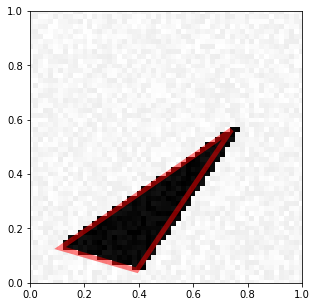

In [124]:
visualize_prediction(X_train[54].reshape(-1), Y_train[54])

In [125]:
class Regressor:
    def __init__(self, opt='adam'):
        assert opt in ['sgd', 'adam', 'adadelta'], "Optimizer unknown try sgd, adam or adadelta"
        self.opt = opt
        model = keras.Sequential()
        model.add(keras.layers.Conv2D(16, kernel_size=(5,5), activation='relu'))
        model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
        model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
        model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
        model.add(keras.layers.Conv2D(96, kernel_size=(3,3), activation='relu'))
        model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
        model.add(keras.layers.Flatten())
        model.add(keras.layers.Dense(96, activation="tanh"))
        model.add(keras.layers.Dense(6, activation="tanh"))
        if self.opt == 'adam':
            optimizer=keras.optimizers.Adam(lr=0.001)
        elif self.opt == 'sgd':
            optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9)
        else:
            optimizer=keras.optimizers.Adadelta()
        self.model = model
        self.optimizer= optimizer
        self.model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])
        self.mean = 0.
        self.std = 1.
    
    def fit(self, X_train, Y_train, batch_size=64, epochs=100, verbose=False, validation_split=0.1):
        self.mean_y, self.std_y = Y_train.mean(axis=0), Y_train.std(axis=0)
        self.mean_x, self.std_x = X_train.mean(axis=0), X_train.std(axis=0)
        #Y_train = (Y_train - self.mean_y)/self.std_y
        #X_train = (X_train - self.mean_x)/self.std_x
        self.model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_split=validation_split)
        plt.plot(self.model.history.history['acc'])
        plt.plot(self.model.history.history['loss'])
        plt.legend(['acc','loss'])
        plt.show()
        
    def evaluate(self, X_test, Y_test):
        #Y_test = (Y_test - self.mean_y)/self.std_y
        #X_test = (X_test - self.mean_x)/self.std_x
        results = self.model.evaluate(X_test, Y_test)
        print('Loss: %f\nAcc: %f' % tuple(results))
        
    def predict(self, X_test):
        #X_test = (X_test - self.mean_x)/self.std_x
        results = self.model.predict(X_test)
        #results = results * self.std_y + self.mean_y
        return results

In [126]:
reg = Regressor('adadelta')

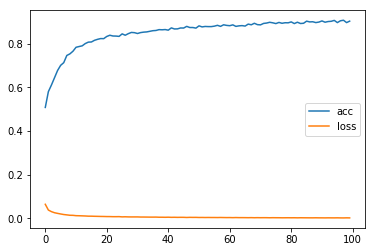

In [127]:
reg.fit(X_train, Y_train, epochs=100)

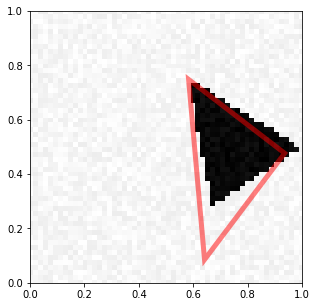

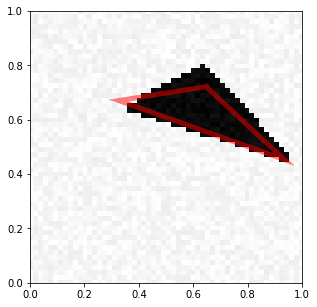

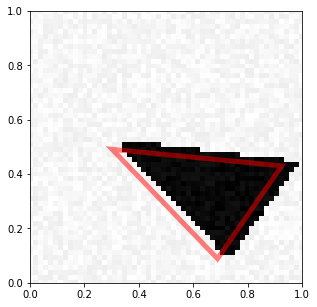

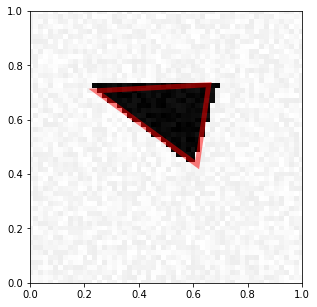

In [130]:
Y_predict = reg.predict(X_test)
for i in np.random.randint(Y_predict.shape[0], size=4):
    visualize_prediction(X_test[i].reshape(-1), Y_predict[i])

The result is far from perfect but it provides a good approximation!